In [90]:
import pandas as pd
import numpy as np

# Import clean data 
path = "/resources/ANZ_Internship/Clean_Anz_data.csv"
df = pd.read_csv(path)

In [91]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


In [92]:
df.head()

,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,CUS-2487424745,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,debit
1,CUS-2487424745,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,debit
2,CUS-2142601169,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,debit
3,CUS-1614226872,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,debit
4,CUS-2487424745,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,debit


In [94]:
df['customer_id'].nunique() #There are 100 unique customer in the dataset.

100

<font size="5">**The Average of the money spent by the customer**</font>

In [95]:
average_money_spend = df['amount'].mean(axis = 0).round(2)
average_money_spend

print('The avrage of money spent by the customer is $' + str(average_money_spend))
#The average amount of money spent by all customer is $187.93 

The avrage of money spent by the customer is $187.93


<font size="5">**The Average of the money spent by the customer monthly**</font>

In [96]:
df_monthly = df[['amount','date']]
df_monthly['date'] = pd.to_datetime(df_monthly['date'])
df_monthly.set_index(['date'], inplace = True)
df_monthly_spend = df_monthly.groupby(pd.Grouper(freq='M')).mean().round(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df_monthly_spend.reset_index(inplace = True)

In [98]:
df_monthly_spend['date'] = df_monthly_spend['date'].dt.strftime('%Y-%m')

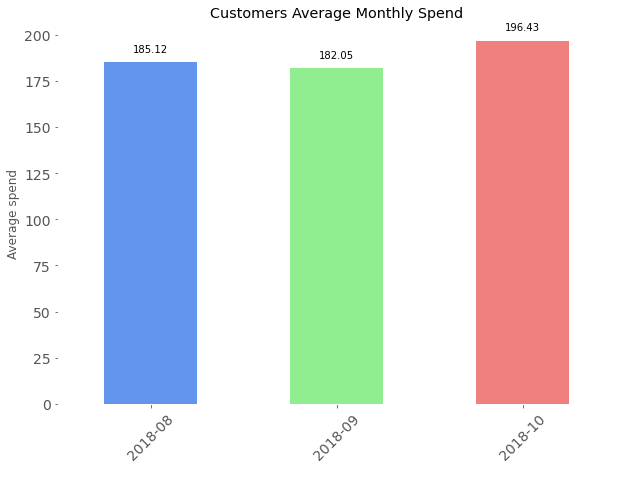

In [99]:
ax_ms = df_monthly_spend.plot(x = 'date', y = 'amount', kind = 'bar', figsize = (10,7), color = ['cornflowerblue','lightgreen','lightcoral'], fontsize = 14, legend = False)
ax_ms.set_title("Customers Average Monthly Spend")
ax_ms.set_xlabel(" ")
ax_ms.set_ylabel("Average spend")
ax_ms.set_facecolor('white')
plt.setp(ax_ms.xaxis.get_majorticklabels(), rotation=45)

for p in ax_ms.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax_ms.annotate(height, (x + width/2, y + height*1.03), ha='center')

<font size="5">**The total transaction volume monthly**</font>

In [100]:
df_monthly_trans = df_monthly.groupby(pd.Grouper(freq='M')).count()
df_monthly_trans.reset_index(inplace = True)
df_monthly_trans['date'] = df_monthly_trans['date'].dt.strftime('%Y-%m')

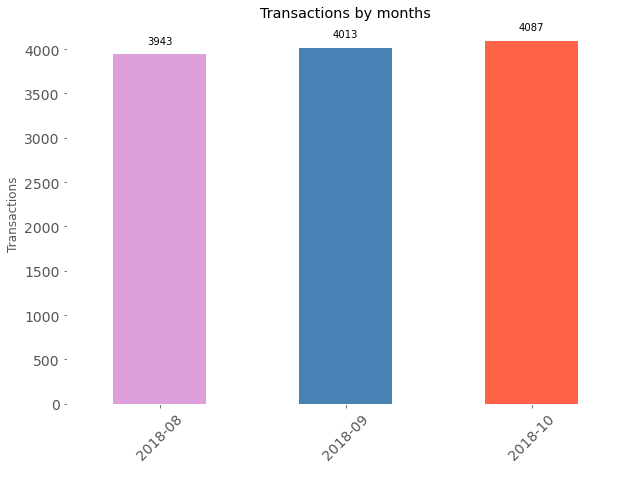

In [101]:
ax_mt = df_monthly_trans.plot(x = 'date', y = 'amount', kind = 'bar', figsize = (10,7), color = ['plum','steelblue','tomato'], fontsize = 14, legend = False)
ax_mt.set_title("Transactions by months")
ax_mt.set_xlabel(" ")
ax_mt.set_ylabel("Transactions")
ax_mt.set_facecolor('white')
plt.setp(ax_mt.xaxis.get_majorticklabels(), rotation=45)

for p in ax_mt.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax_mt.annotate(height, (x + width/2, y + height*1.03), ha='center')

<font size="5">**The transaction volume over the course of weeks**</font>

In [102]:
df_weekly = df[['amount','date']]
df_weekly['date'] = pd.to_datetime(df_weekly['date'])
df_weekly.set_index(['date'], inplace = True)
df_weekly_spend = df_weekly.groupby(pd.Grouper(freq='W')).mean().round(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
df_weekly_spend.head(5)  

,amount
date,
2018-08-05,151.32
2018-08-12,191.74
2018-08-19,180.22
2018-08-26,189.80
2018-09-02,162.71


In [104]:
df_weekly_spend.reset_index(inplace = True)
df_weekly_spend['date'] = df_weekly_spend['date'].dt.strftime('%Y-%m-%d')

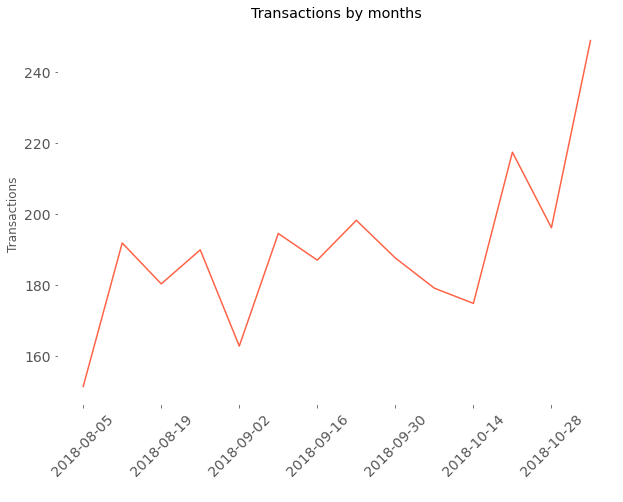

In [105]:
ax_ws = df_weekly_spend.plot(x = 'date', y = 'amount', kind = 'line', figsize = (10,7), color = ['tomato'], fontsize = 14, legend = False)
ax_ws.set_title("Transactions by months")
ax_ws.set_xlabel(" ")
ax_ws.set_ylabel("Transactions")
ax_ws.set_facecolor('white')
plt.setp(ax_ws.xaxis.get_majorticklabels(), rotation=45)
plt.show()

<font size="5">**Challenge: Transaction amount by state**</font>

In [128]:
df_lospend = df[['amount','merchant_state']]

In [107]:
df_lospend = df_lospend.groupby('merchant_state', axis = 0).sum().round(2)

In [108]:
df_lospend.reset_index(inplace = True)

In [109]:
df_lospend.sort_values(by = 'amount', ascending = False, axis = 0, inplace = True)

In [110]:
df_lospend.head()

,merchant_state,amount
1,NSW,102021.77
6,VIC,87584.00
3,QLD,53483.45
7,WA,33992.06
4,SA,16776.57


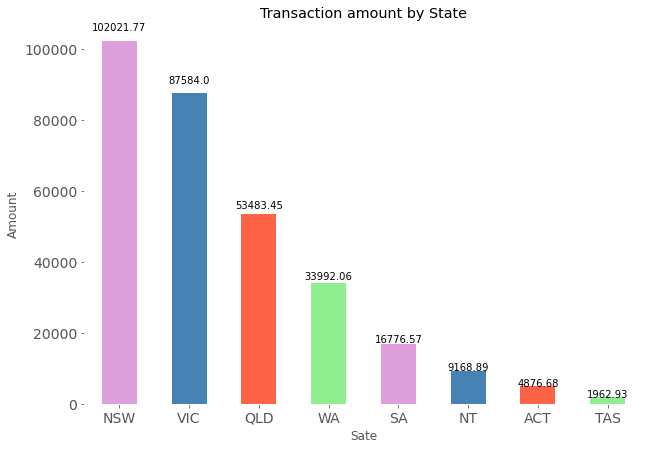

In [125]:
ax = df_lospend.plot(kind = 'bar', x = 'merchant_state', y = 'amount', figsize = (10,7), legend = False, color = ['plum','steelblue','tomato','lightgreen'], fontsize = 14)
ax.set_title("Transaction amount by State")
ax.set_xlabel("Sate")
ax.set_ylabel("Amount")
ax.set_facecolor("white")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=360)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, (x + width/2, y + height*1.03), ha='center')

plt.show()